In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_44/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed



[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)




**Motivación**:
Esta notebook es un bonus para que observen como generar un algoritmo de descenso por gradiente solamente usando numpy.

Recordemos que para el caso lineal solamente queremos calcular iterativamente la siguiente expresión:

{ $\theta_j= \theta_j - \alpha\frac{1}{2m}\sum_{i=1}^{m}(y_{i}- \hat y_{i})^{2}$}

Es decir en cada paso queremos actualizar el valor del coeficiente simplemente agregandole un termino que puede ser negativo o positivo (la derivada de la función de costo).
Probemos como seria eso en python:

Generamos una fucion que nos da una relacion lineal con cierto ruido.

In [2]:
def genData(numPoints, bias, variance):
    import numpy as np
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + np.random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, Y = genData(100, 25, 10)
X = x[:,1]

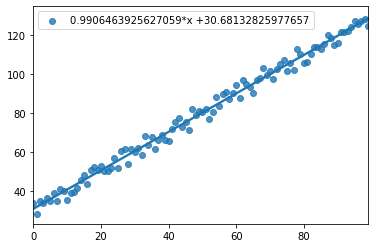

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#regression part: Calculamos los coeficientes a ver si tiene sentido.
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
# genero la leyenda
line = str(slope) + "*x +" + str(intercept)
# hago el grafico
p = sns.regplot(x=X,y=Y,label=line)
# muestro la leyenda.
p.legend();


Parece que tenemos una relacion lineal entre estas variables donde la pendiente tiene a 1 y la ordenada al origen a 31.

In [9]:
# me genero la rutna de descenso por gradiente
def gradient_descent(X, Y, lr=0.0001, epochs=100000):
    
    '''
    Gradient Descent for a single feature
    '''
    # Building the model
    from sklearn.metrics import mean_squared_error
    import numpy as np
    # defino aleatoriamente los betas.
    beta0 = 100
    beta1 = 100
    # lista para exportar evolucion de beta0 y beta1
    
    beta0_t=[]
    beta1_t=[]
    mse_t=[]
    n = float(len(X)) # Number of elements in X

    # Performing Gradient Descent 
    for _ in range(epochs): 
        # calculo el y pred.
        Y_pred = beta1*X + beta0  # The current predicted value of Y
        # calculo el diferecial para cada beta.
        D_beta1 = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
        D_beta0 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
        # actualizo el valor de beta en cada paso.
        beta1 = beta1 - lr * D_beta1  # Update m
        beta0 = beta0 - lr * D_beta0  # Update c
        mse = mean_squared_error(Y,Y_pred)
        # guardo la evolucion de los betas y la funcion de costo.
        beta0_t.append(beta0)
        beta1_t.append(beta1)
        mse_t.append(mse)
    return beta0,beta1,beta0_t,beta1_t,mse_t
    
intercept,slope,beta0_t,beta1_t,mse_t=gradient_descent(X,Y)

In [10]:
print('slope:     %10.3f \nintercept: %10.3f' %(slope,intercept))

slope:          0.984 
intercept:     31.105


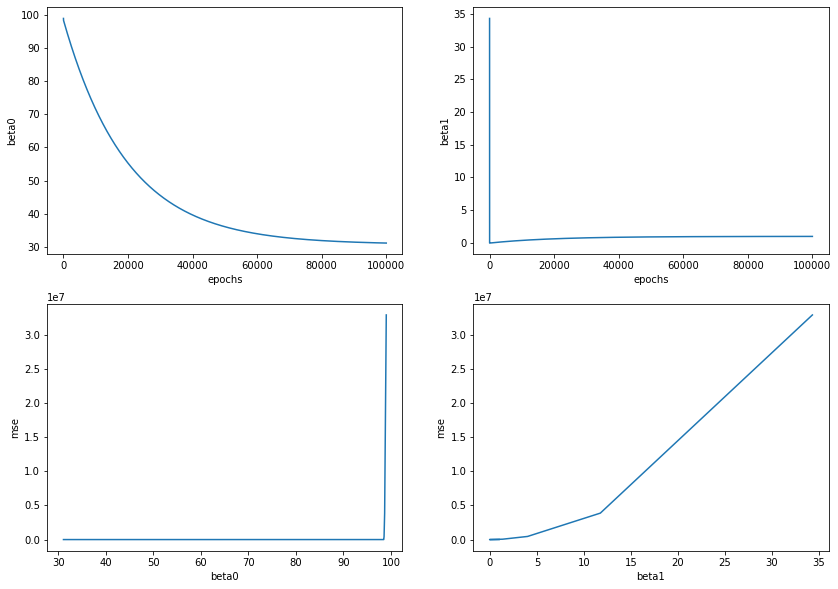

In [11]:
fig = plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.plot(beta0_t)
plt.ylabel('beta0')
plt.xlabel('epochs')

plt.subplot(2, 2, 2)
plt.plot(beta1_t)
plt.ylabel('beta1')
plt.xlabel('epochs')

plt.subplot(2, 2, 3)
plt.plot(beta0_t,mse_t)
plt.ylabel('mse')
plt.xlabel('beta0')


plt.subplot(2, 2, 4)
plt.plot(beta1_t,mse_t)
plt.ylabel('mse')
plt.xlabel('beta1')

plt.show()

En función de los pasos de iteraccion (epochs) vean como converge al valor del beta 0 y 1 o ordenada al origen y pendiente respectivamente.

**Conclusión**: Con solo una simple rutina nos generamos un algoritmo que calcula la pendiente y la ordenada al origen de manera muy fácil.